In [78]:
import pandas as pd
data = []
data.append(pd.read_csv("phase2_results/old_60.csv"))
data.append(pd.read_csv("phase2_results/old_60_o3.csv"))
data.append(pd.read_csv("phase2_results/new_60.csv"))
print(data[0])
print(data[1])
print(data[2])


    instance  bks     nbh  time      seed  makespan
0       X6_8  147    swap    60   8948803       157
1       X6_8  147    swap    60   9459607       158
2       X6_8  147    swap    60  40594335       157
3       X6_8  147    swap    60  41299189       158
4       X6_8  147    swap    60  55911072       159
..       ...  ...     ...   ...       ...       ...
395    X59_3  108  random    60  59528639       111
396    X59_3  108  random    60  61045676       111
397    X59_3  108  random    60  81907177       111
398    X59_3  108  random    60  84183543       111
399    X59_3  108  random    60  85838798       110

[400 rows x 6 columns]
    instance  bks     nbh  time      seed  makespan
0       X6_8  147    swap    60   8948803       154
1       X6_8  147    swap    60   9459607       151
2       X6_8  147    swap    60  40594335       152
3       X6_8  147    swap    60  41299189       153
4       X6_8  147    swap    60  55911072       156
..       ...  ...     ...   ...       ..

/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/old_swap.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/old_api.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/old_shift.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/old_random.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/oldo3_swap.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/oldo3_api.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/oldo3_shift.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/oldo3_random.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/new_swap.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/new_api.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/new_shift.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/new_random.pdf


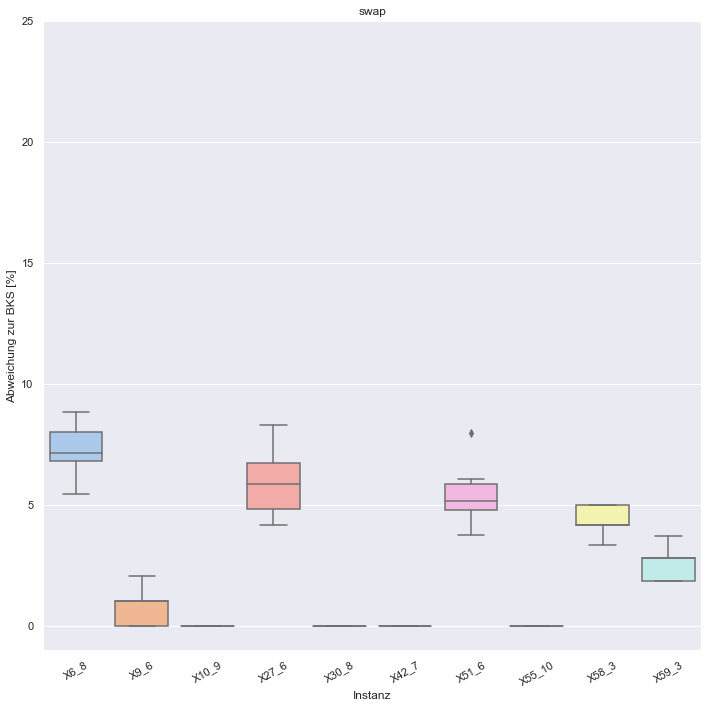

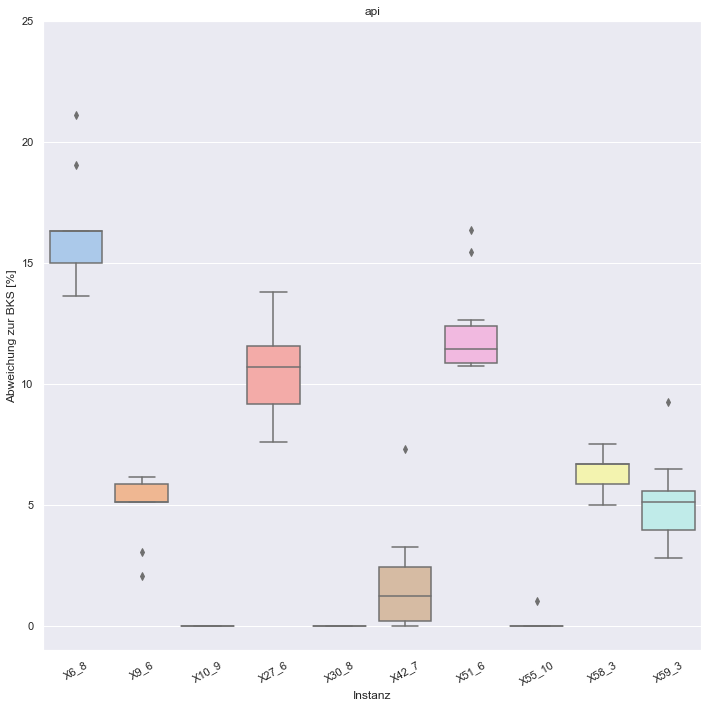

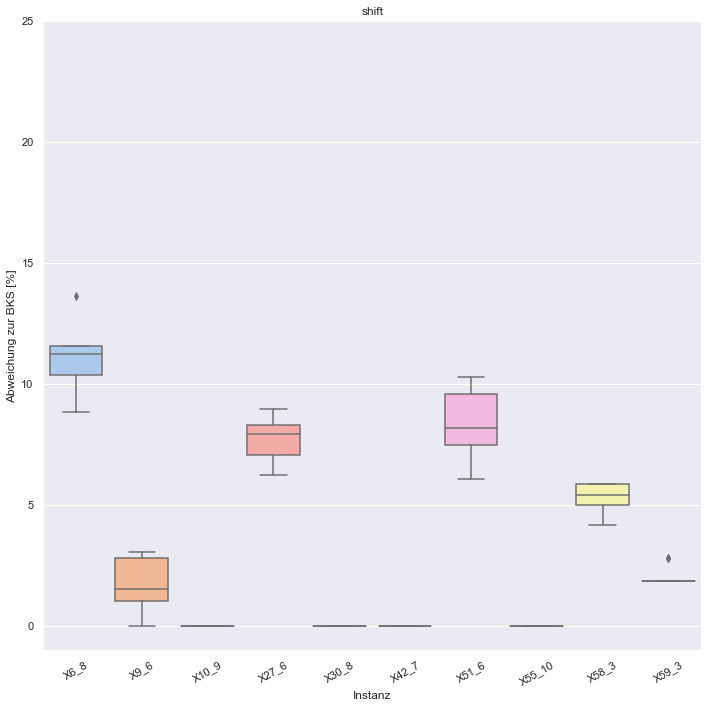

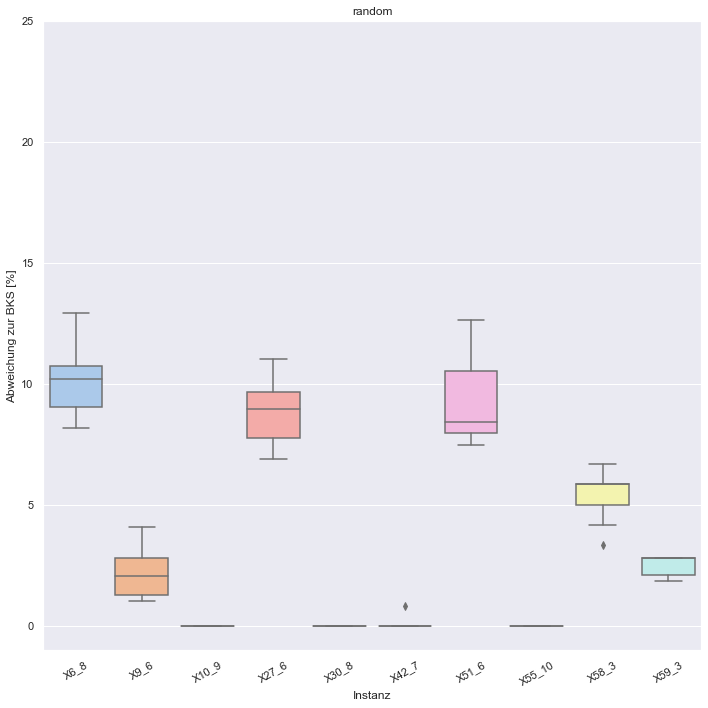

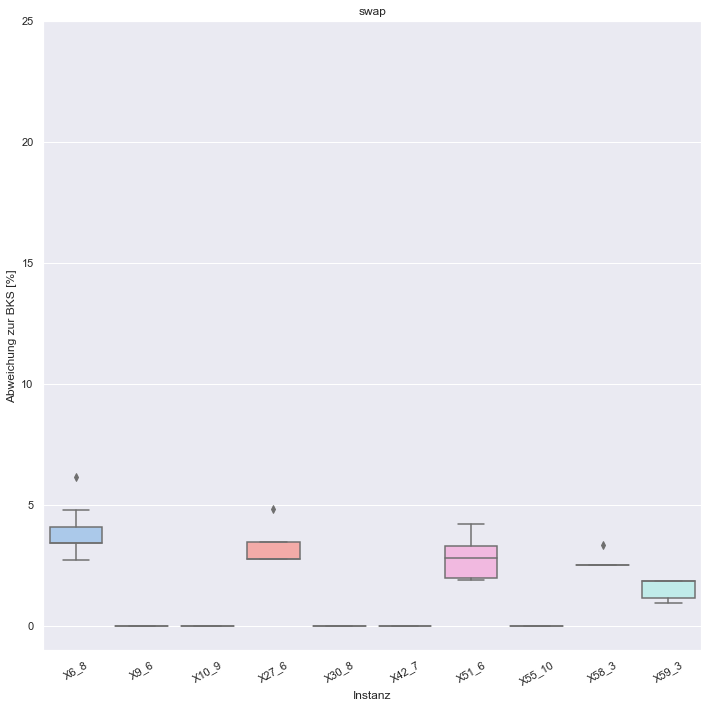

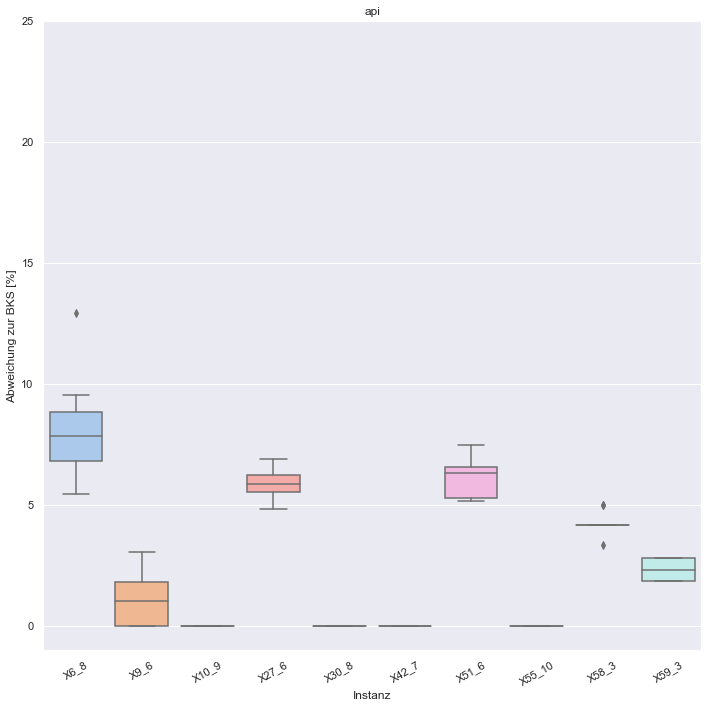

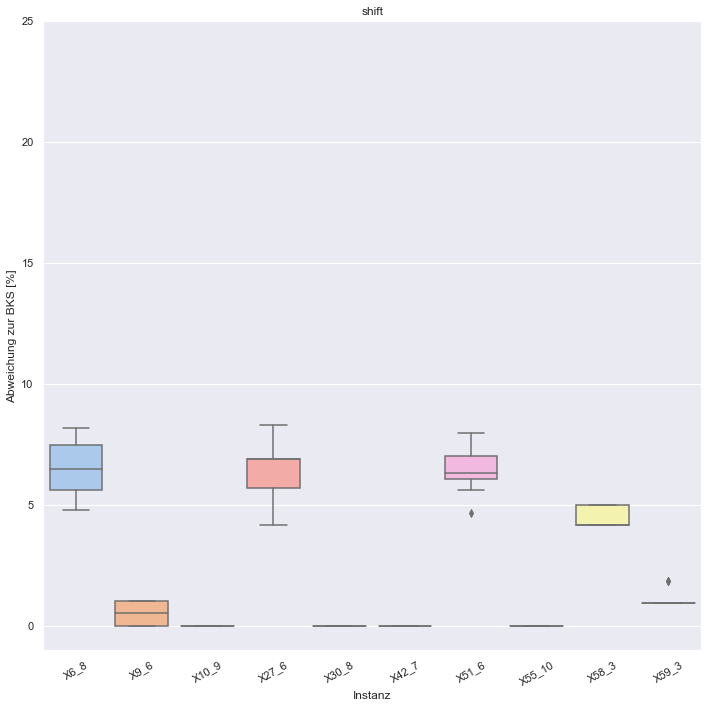

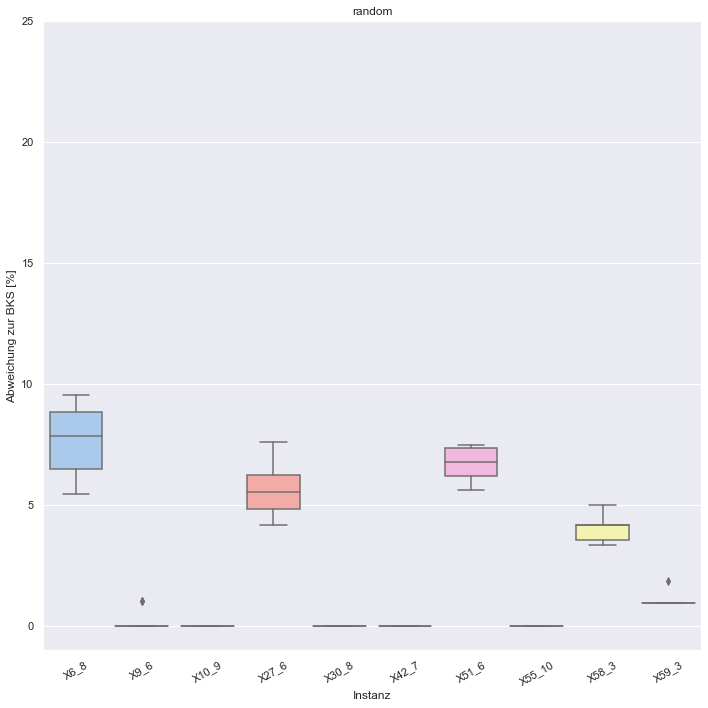

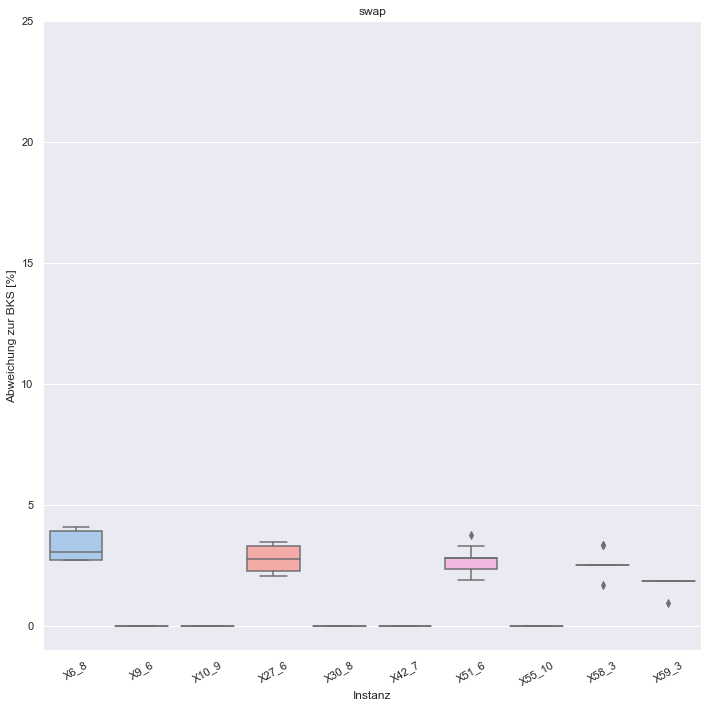

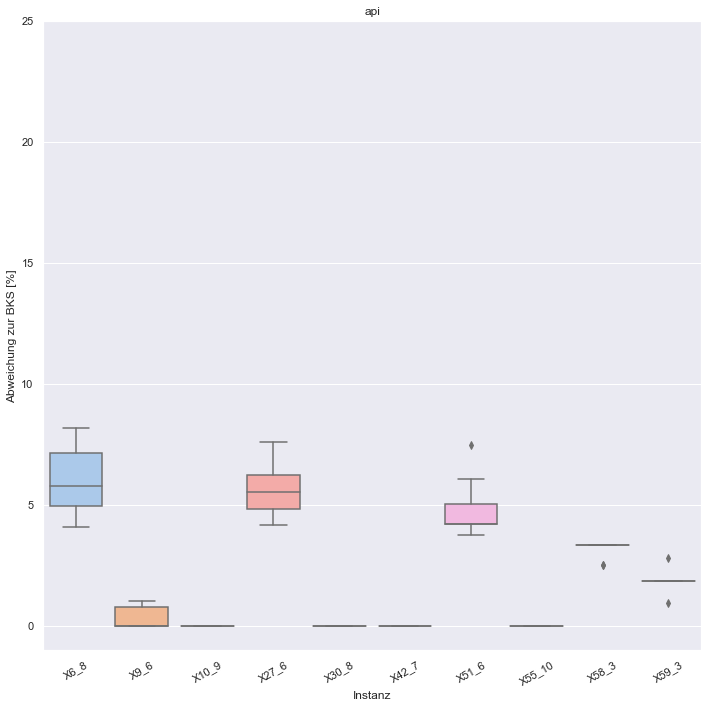

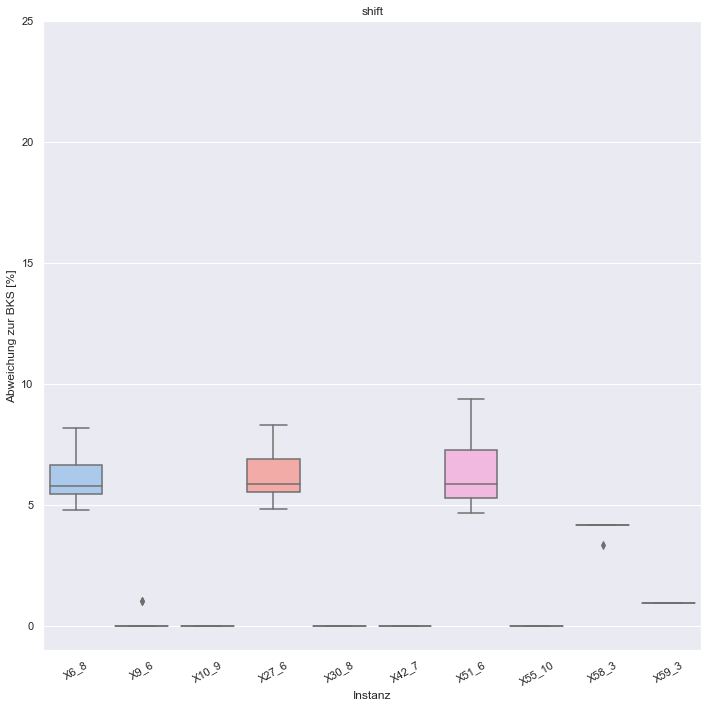

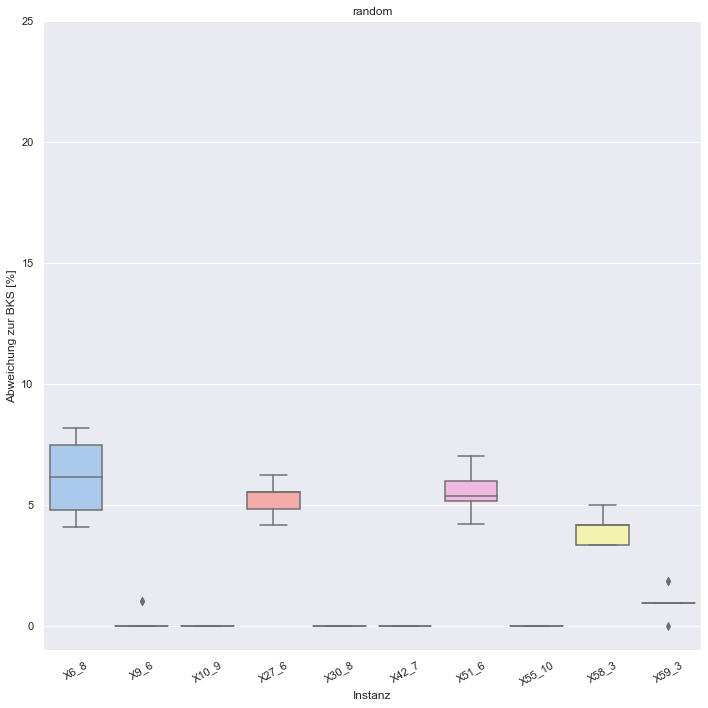

In [97]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.abspath("../presentation/2/images")

for i, da in enumerate(data):
    for nbh in ["swap","api","shift","random"]:
        d = da.loc[da["nbh"] == nbh]

        if i == 0:
            prefix = "old"
        if i == 1:
            prefix = "oldo3"
        if i == 2:
            prefix = "new"

        figname = os.path.join(path, f"results_{prefix}_{nbh}.pdf")
        print(figname)

        fig, ax = plt.subplots(figsize=(10,10))
        # fig, ax = plt.subplots()
        sns.set_theme()
        sns.set_palette("pastel")

        sns.boxplot(ax=ax, x=d.instance,  y=(d.makespan/d.bks - 1) * 100)
        ax.set(title=nbh, xlabel="Instanz", ylabel="Abweichung zur BKS [%]", ylim=(-1,25))

        # sns.scatterplot(ax=ax, x=d.instance,  y=d.bks, s=100)
        # sns.boxplot(ax=ax, x=d.instance,  y=d.makespan)
        # ax.set(title=nbh.upper(), xlabel="Instanz", ylabel="Abweichung zur BKS [%]")

        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
        plt.tight_layout()
        # plt.savefig(figname)



/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_old.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_oldo3.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_new.pdf


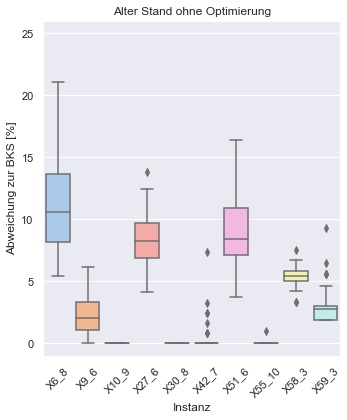

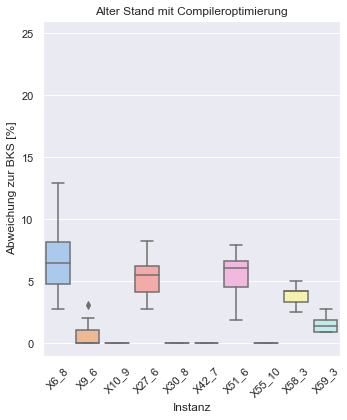

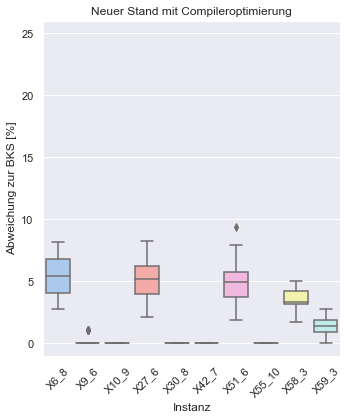

In [125]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.abspath("../presentation/2/images")

for i, da in enumerate(data):
    d = da
    if i == 0:
        prefix = "old"
        title = "Alter Stand ohne Optimierung"
    if i == 1:
        prefix = "oldo3"
        title = "Alter Stand mit Compileroptimierung"
    if i == 2:
        prefix = "new"
        title = "Neuer Stand mit Compileroptimierung"

    figname = os.path.join(path, f"results_{prefix}.pdf")
    print(figname)

    # continue

    fig, ax = plt.subplots(figsize=(5,6))
    # fig, ax = plt.subplots()
    sns.set_theme()
    sns.set_palette("pastel")

    sns.boxplot(ax=ax, x=d.instance,  y=(d.makespan/d.bks - 1) * 100)
    ax.set(title=title, xlabel="Instanz", ylabel="Abweichung zur BKS [%]", ylim=(-1,26))

    # sns.scatterplot(ax=ax, x=d.instance,  y=d.bks, s=100)
    # sns.boxplot(ax=ax, x=d.instance,  y=d.makespan)
    # ax.set(title=nbh.upper(), xlabel="Instanz", ylabel="Abweichung zur BKS [%]")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.savefig(figname)



/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_swap.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_api.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_shift.pdf
/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_random.pdf


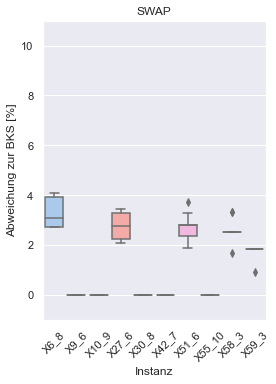

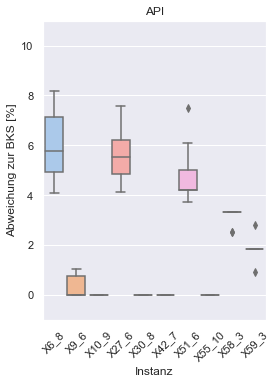

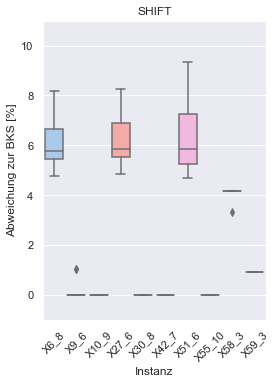

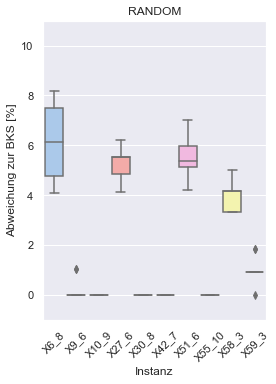

In [124]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.abspath("../presentation/2/images")

for i, nbh in enumerate(["swap","api","shift","random"]):
    title = f"{nbh.upper()}"

    d = data[2].loc[data[2]["nbh"] == nbh]

    figname = os.path.join(path, f"results_{nbh}.pdf")
    print(figname)

    # continue

    fig, ax = plt.subplots(figsize=(4,5.5))
    # fig, ax = plt.subplots()
    sns.set_theme()
    sns.set_palette("pastel")

    sns.boxplot(ax=ax, x=d.instance,  y=(d.makespan/d.bks - 1) * 100)
    ax.set(title=title, xlabel="Instanz", ylabel="Abweichung zur BKS [%]", ylim=(-1,11))

    # sns.scatterplot(ax=ax, x=d.instance,  y=d.bks, s=100)
    # sns.boxplot(ax=ax, x=d.instance,  y=d.makespan)
    # ax.set(title=nbh.upper(), xlabel="Instanz", ylabel="Abweichung zur BKS [%]")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.savefig(figname)



/home/dm/uni/10sem/rcpsp/ScheduleMe/presentation/2/images/results_random.pdf


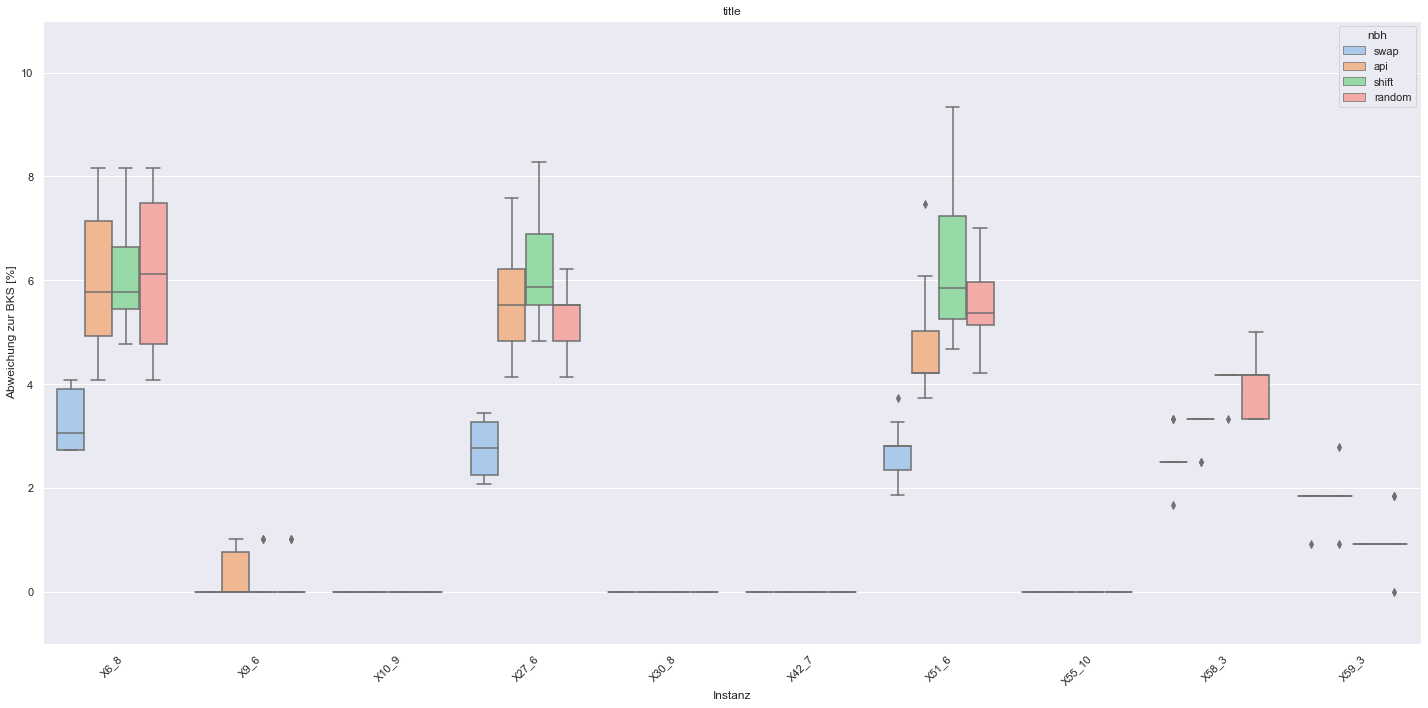

In [146]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.abspath("../presentation/2/images")

title = f"title"

d = data[2]
# d = data[2].loc[data[2]["nbh"] == nbh]

figname = os.path.join(path, f"results_{nbh}.pdf")
print(figname)

# continue

fig, ax = plt.subplots(figsize=(20,10))
# fig, ax = plt.subplots()
sns.set_theme()
sns.set_palette("pastel")

sns.boxplot(ax=ax, x=d.instance,  y=(d.makespan/d.bks - 1) * 100, hue=d.nbh)
ax.set(title=title, xlabel="Instanz", ylabel="Abweichung zur BKS [%]", ylim=(-1,11))
# sns.despine(offset=20, trim=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
# plt.savefig(figname)

